In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet

from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
path = glob('/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/*.xml')
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [12]:
df = pd.DataFrame(labels_dict)
df.to_csv('labels.csv',index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/Automatic-License-Plate...,1093,1396,645,727
1,/content/drive/MyDrive/Automatic-License-Plate...,31,139,128,161
2,/content/drive/MyDrive/Automatic-License-Plate...,134,301,312,350
3,/content/drive/MyDrive/Automatic-License-Plate...,164,316,216,243
4,/content/drive/MyDrive/Automatic-License-Plate...,813,1067,665,724


In [13]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images',filename_image)
    return filepath_image
getFilename(filename)

'/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N1.jpeg'

In [14]:
image_path = list(df['filepath'].apply(getFilename))
image_path[:10]

['/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N1.jpeg',
 '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N101.jpeg',
 '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N100.jpeg',
 '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N102.jpeg',
 '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N103.jpeg',
 '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N104.jpeg',
 '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N105.jpeg',
 '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N107.jpeg',
 '/content/drive/MyDrive/A


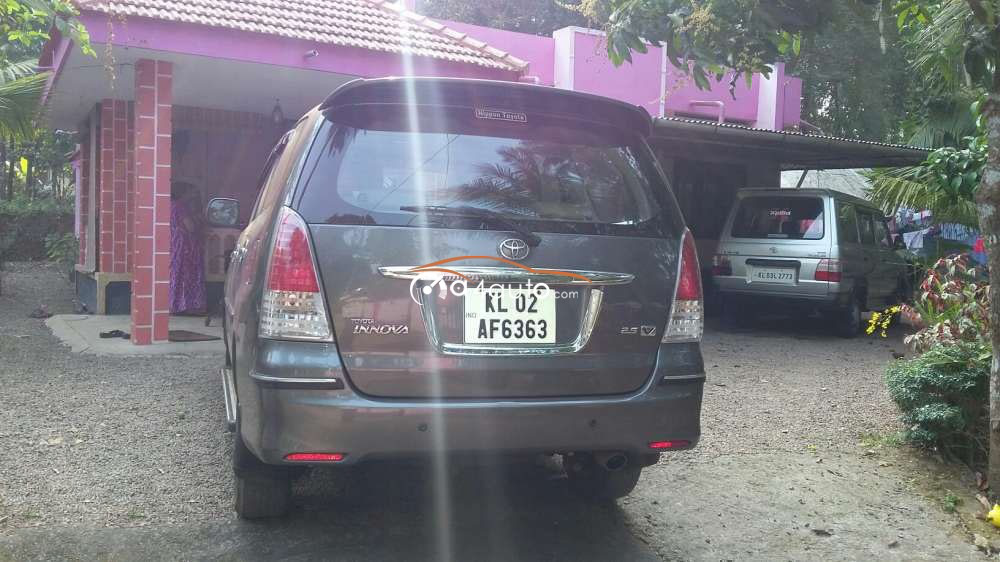

In [15]:
#DATA VERIFICATION
file_path = image_path[87] #path of our image N2.jpeg
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882 
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 1 - N2.jpeg with bounding box')
fig.add_shape(type='rect',x0=1804, x1=2493, y0=1734, y1=1882, xref='x', yref='y',line_color='cyan')

In [16]:
file_path = image_path[87] 

In [17]:
file_path

'/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N186.jpeg'

In [18]:
#Tensorflow modules
from google.colab.patches import cv2_imshow

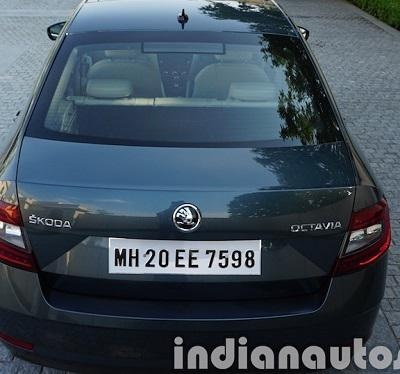

In [19]:
first = ('/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N239.jpeg')

img = cv2.imread(first)

cv2_imshow(img)

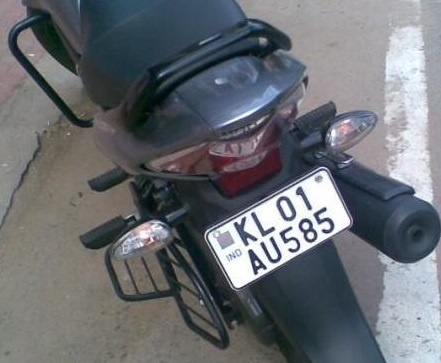

In [20]:
second = ("/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N107.jpeg")
img = cv2.imread(second)
cv2_imshow(img)

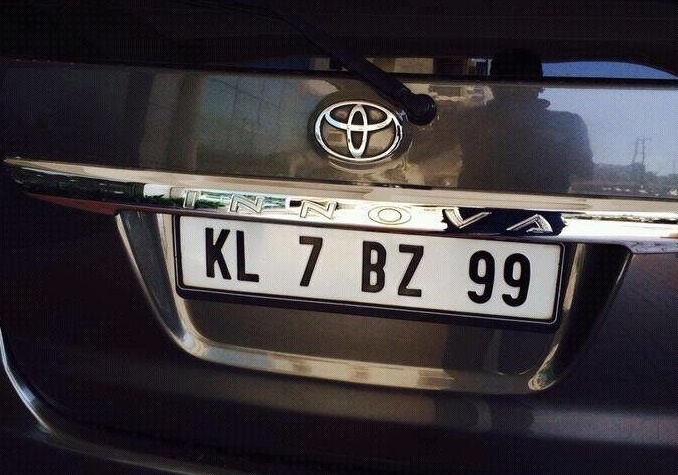

In [50]:
third = ('/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N119.jpeg')

img = cv2.imread(third)

cv2_imshow(img)

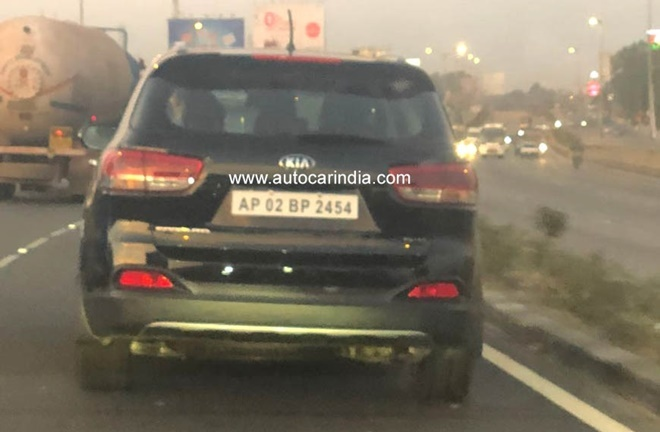

In [51]:
four = ('/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N134.jpeg')

img = cv2.imread(four)

cv2_imshow(img)

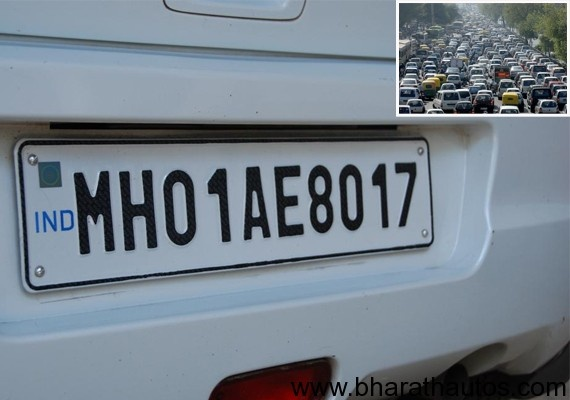

In [52]:
five = ("/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N171.jpeg")
img = cv2.imread(five)
cv2_imshow(img)

In [21]:
#DATA PROCESSING
labels = df.iloc[:,1:].values
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [22]:
# Convert data to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [23]:
# Split the data into training and testing set using sklearn.
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

In [24]:
# parsing
def parsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    filename = f'/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/{name}'

    # width and height
    parser_size = parser.find('size')
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)
    
    return filename, width, height
df[['filename','width','height']] = df['filepath'].apply(parsing).apply(pd.Series)
df.head()

,filepath,xmin,xmax,ymin,ymax,filename,width,height
0,/content/drive/MyDrive/Automatic-License-Plate...,1093,1396,645,727,/content/drive/MyDrive/Automatic-License-Plate...,1920,1080
1,/content/drive/MyDrive/Automatic-License-Plate...,31,139,128,161,/content/drive/MyDrive/Automatic-License-Plate...,249,239
2,/content/drive/MyDrive/Automatic-License-Plate...,134,301,312,350,/content/drive/MyDrive/Automatic-License-Plate...,450,417
3,/content/drive/MyDrive/Automatic-License-Plate...,164,316,216,243,/content/drive/MyDrive/Automatic-License-Plate...,478,395
4,/content/drive/MyDrive/Automatic-License-Plate...,813,1067,665,724,/content/drive/MyDrive/Automatic-License-Plate...,1800,1200


In [25]:
df['center_x'] = (df['xmax'] + df['xmin'])/(2*df['width'])
df['center_y'] = (df['ymax'] + df['ymin'])/(2*df['height'])

df['bb_width'] = (df['xmax'] - df['xmin'])/df['width']
df['bb_height'] = (df['ymax'] - df['ymin'])/df['height']
df.head()

,filepath,xmin,xmax,ymin,ymax,filename,width,height,center_x,center_y,bb_width,bb_height
0,/content/drive/MyDrive/Automatic-License-Plate...,1093,1396,645,727,/content/drive/MyDrive/Automatic-License-Plate...,1920,1080,0.648177,0.635185,0.157812,0.075926
1,/content/drive/MyDrive/Automatic-License-Plate...,31,139,128,161,/content/drive/MyDrive/Automatic-License-Plate...,249,239,0.341365,0.604603,0.433735,0.138075
2,/content/drive/MyDrive/Automatic-License-Plate...,134,301,312,350,/content/drive/MyDrive/Automatic-License-Plate...,450,417,0.483333,0.793765,0.371111,0.091127
3,/content/drive/MyDrive/Automatic-License-Plate...,164,316,216,243,/content/drive/MyDrive/Automatic-License-Plate...,478,395,0.502092,0.581013,0.317992,0.068354
4,/content/drive/MyDrive/Automatic-License-Plate...,813,1067,665,724,/content/drive/MyDrive/Automatic-License-Plate...,1800,1200,0.522222,0.578750,0.141111,0.049167


In [27]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [28]:
!pip install -r ./yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [29]:
mkdir /content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images

mkdir: cannot create directory ‘/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images’: File exists


In [30]:
mkdir /content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/test

mkdir: cannot create directory ‘/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/test’: File exists


In [31]:
mkdir /content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/train

mkdir: cannot create directory ‘/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/train’: File exists


In [32]:
### split the data into train and test
df_train = df.iloc[:200]
df_test = df.iloc[200:]

In [33]:
train_folder = '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/train'

values = df_train[['filename','center_x','center_y','bb_width','bb_height']].values
for fname, x,y, w, h in values:
    image_name = os.path.split(fname)[-1]
    txt_name = os.path.splitext(image_name)[0]
    
    dst_image_path = os.path.join(train_folder,image_name)
    dst_label_file = os.path.join(train_folder,txt_name+'.txt')
    
    # copy each image into the folder
    copy(fname,dst_image_path)

    # generate .txt which has label info
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dst_label_file,mode='w') as f:
        f.write(label_txt)
        
        f.close()

test_folder = '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/test'

values = df_test[['filename','center_x','center_y','bb_width','bb_height']].values
for fname, x,y, w, h in values:
    image_name = os.path.split(fname)[-1]
    txt_name = os.path.splitext(image_name)[0]
    
    dst_image_path = os.path.join(test_folder,image_name)
    dst_label_file = os.path.join(test_folder,txt_name+'.txt')
    
    # copy each image into the folder
    copy(fname,dst_image_path)

    # generate .txt which has label info
    label_txt = f'0 {x} {y} {w} {h}'
    with open(dst_label_file,mode='w') as f:
        f.write(label_txt)
        
        f.close()

In [34]:
import yaml
yaml_dict = {'train': '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/train',   # path to the train folder
            'val': '/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/data_images/test', # path to the val folder
            'nc': 1,                             # number of classes
            'names': ['license_plate']}                # list of label names

with open(r'./yolov5/data.yaml', 'w') as file:
    documents = yaml.dump(yaml_dict, file)

In [35]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [36]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7408 sha256=b42399e6c472f4157defdd38d3073a5a59a9cf2357cfc67013472afc7389fffa
  Stored in directory: /root/.cache/pip/wheels/2b/b5/24/fbb56595c286984f7315ee31821d6121e1b9828436021a88b3
Successfully built GPUtil


In [39]:
!python ./yolov5/train.py --data ./yolov5/data.yaml --cfg ./yolov5/models/yolov5s.yaml --batch-size 8 --name Model --epochs 40

train: weights=yolov5/yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=./yolov5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-153-gff6a9ac Python-3.9.16 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0

In [40]:
# settings
INPUT_WIDTH =  640
INPUT_HEIGHT = 640


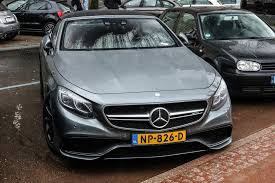

In [43]:
# LOAD THE IMAGE
img = io.imread('/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N11.jpeg')

fig = px.imshow(img)
fig.update_layout(width=700, height=400, margin=dict(l=10, r=10, b=10, t=10))
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.show()

In [60]:
!python export.py --weights yolov5s.pt --include onnx

python3: can't open file '/content/export.py': [Errno 2] No such file or directory


In [67]:
!pip install yolov5-onnx-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def get_detections(img,net):
    # 1.CONVERT IMAGE TO YOLO FORMAT
    image = img.copy()
    row, col, d = image.shape

    max_rc = max(row,col)
    input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
    input_image[0:row,0:col] = image

    # 2. GET PREDICTION FROM YOLO MODEL
    blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WIDTH,INPUT_HEIGHT),swapRB=True,crop=False)
    net.setInput(blob)
    preds = net.forward()
    detections = preds[0]
    
    return input_image, detections

def non_maximum_supression(input_image,detections):
    
    # 3. FILTER DETECTIONS BASED ON CONFIDENCE AND PROBABILIY SCORE
    
    # center x, center y, w , h, conf, proba
    boxes = []
    confidences = []

    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WIDTH
    y_factor = image_h/INPUT_HEIGHT

    for i in range(len(detections)):
        row = detections[i]
        confidence = row[4] # confidence of detecting license plate
        if confidence > 0.4:
            class_score = row[5] # probability score of license plate
            if class_score > 0.25:
                cx, cy , w, h = row[0:4]

                left = int((cx - 0.5*w)*x_factor)
                top = int((cy-0.5*h)*y_factor)
                width = int(w*x_factor)
                height = int(h*y_factor)
                box = np.array([left,top,width,height])

                confidences.append(confidence)
                boxes.append(box)

    # 4.1 CLEAN
    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()
    
    # 4.2 NMS
    index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45)
    
    return boxes_np, confidences_np, index

def drawings(image,boxes_np,confidences_np,index):
    # 5. Drawings
    for ind in index:
        x,y,w,h =  boxes_np[ind]
        bb_conf = confidences_np[ind]
        conf_text = 'plate: {:.0f}%'.format(bb_conf*100)
        license_text = extract_text(image,boxes_np[ind])


        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.rectangle(image,(x,y-30),(x+w,y),(255,0,255),-1)
        cv2.rectangle(image,(x,y+h),(x+w,y+h+25),(0,0,0),-1)


        cv2.putText(image,conf_text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),1)
        cv2.putText(image,license_text,(x,y+h+27),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),1)

    return image

In [ ]:
# predictions flow with return result
def yolo_predictions(img,net):
    # step-1: detections
    input_image, detections = get_detections(img,net)
    # step-2: NMS
    boxes_np, confidences_np, index = non_maximum_supression(input_image, detections)
    # step-3: Drawings
    result_img = drawings(img,boxes_np,confidences_np,index)
    return result_img

In [ ]:
# extrating text
def extract_text(image,bbox):
    x,y,w,h = bbox
    roi = image[y:y+h, x:x+w]
    
    if 0 in roi.shape:
        return 'no number'
    
    else:
        text = pt.image_to_string(roi)
        text = text.strip()
        
        return text

In [89]:
df = glob("/content/drive/MyDrive/Automatic-License-Plate-Detection-main/*/*/*/*")
print(len(df))

540


In [90]:
path = "/content/drive/MyDrive/Automatic-License-Plate-Detection-main/Automatic-License-Plate-Detection-main/images/N12.jpeg"

img = cv2.imread(path)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.